# Lagrange Multiplers

## Equality constraint

Consider the problem of finding the maximum of a function $f(x_1, x_2)$ subject to a constraint relating $x_1$ and $x_2$, which we write in the form

$$g(x_1, x_2) = 0 \tag{E.1}$$

The approach that evaluating $x_2 = h(x_1)$ from $g(x_1, x_2) = 0$, and substitute this equation into $f(x_1, x_2)$ is sometimes impractical. Because the form $x_2 = h(x_1)$ may be difficult to find. Moreover, if $x_2$ has a quadratic form in $g$, then $x_2$ can be factorized into different signs. As a result, we have to deal with two situations separately. In the case of high dimentional inputs, it would be intractable.

A more elegant, and often simpler, approach is based on the introduction of a parameter $\lambda$ called a Lagrange multiplier.

We first use the graph of contours to manifest the function $f(x_1, x_2)$ and the constraint $g(x_1, x_2) = 0$. For arbitrary point lie on specific contour, the gradient is orthogonal to the contour. Consider $\mathbf{x}$ and $\mathbf{x}+\mathbf{\epsilon}$ lie in on the same contour, we have

$$\lim_{\|\mathbf{\epsilon}\|\to 0 } \mathbf{\epsilon^T}\nabla f(\mathbf{x}) = 0$$

The point $\mathbf{x}^*$ we seek is at the position where the contours of $f(\mathbf{x})$ and $g(\mathbf{x})=0$ tangent, will gives the maximum or minimum of $f(\mathbf{x})$. And the gradients at this point will have

$$\nabla f + \lambda \nabla g = 0 \tag{E.3}$$

where $\lambda \neq 0$ is known as a *Lagrange multiplier*. Note that $\lambda$ can have either sign. At this point, it is convinient to introduce the *Lagrangian* function defined by 

$$L(\mathbf{x},\lambda) \equiv f(\mathbf{x}) + \lambda g(\mathbf{x}) \tag{E.4}$$

Then we can evaluate the target point $\mathbf{x}^*$ and Lagrange multiplier $\lambda$ by taking derivatives of the Lagrangian.

$$\begin{array}{ll}
\nabla_{\mathbf{x}}L = 0 & \Leftrightarrow & \nabla f+\lambda \nabla g = 0\\
\nabla_{\lambda}L = 0 & \Leftrightarrow & g = 0
\end{array}$$

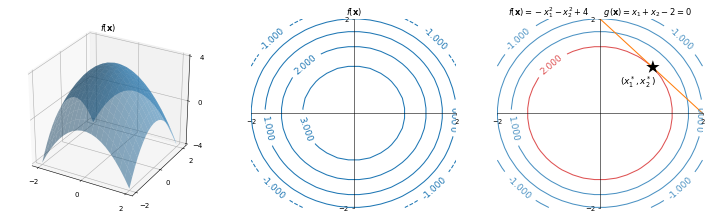

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

f = lambda x1, x2: -x1**2 - x2**2 + 4
g = lambda x1, x2: x1 + x2 - 2

def axesCross(ax):
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_position("zero")
    ax.spines["right"].set_color("none")

def draw_1(ax):
    ax.set_title(r"$f(\mathbf{x})$")
    ax.set_xticks([-2,0,2])
    ax.set_yticks([-2,0,2])
    ax.set_zticks([-4,0,4])
    
    x1, x2 = np.mgrid[-2:2:20j, -2:2:20j]
    y = f(x1, x2)
    ax.plot_surface(x1, x2, y, alpha=.5)


def draw_2(ax):
    axesCross(ax)
    ax.set_title(r"$f(\mathbf{x})$")
    ax.set_xticks([-2,2])
    ax.set_yticks([-2,2])
    
    X1, X2 = np.mgrid[-2:2:20j, -2:2:20j]
    cont = ax.contour(X1, X2, f(X1, X2), levels=range(-1, 5), colors='C0')
    ax.clabel(cont, fontsize=13, inline=1)
    
#     px = 1.45
#     py = np.sqrt(4-px**2)
#     ax.scatter(px, py, s=50)
#     ax.quiver(px, py, -1, -1, color='k', angles='xy', scale=1, scale_units='xy')
#     ax.quiver(px, py, .5, .5, color='k', angles='xy', scale=1, scale_units='xy')
#     ax.text(.2, .8, r"$\nabla g(\mathbf{x})$", fontsize=16, color='k')
#     ax.text(2, 1.4, r"$\nabla f(\mathbf{x})$", fontsize=16, color='k')
    
#     ax.annotate("", xy=(2, -1), xytext=(1, -2), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2"))
#     ax.text(1.7, -1.7, r"$\epsilon$", fontsize=16, color='k')
    
def draw_3(ax):
    axesCross(ax)
    ax.set_title(r"$f(\mathbf{x})=-x_1^2-x_2^2+4 \qquad g(\mathbf{x})=x_1+x_2-2=0$")
    ax.set_xticks([-2,2])
    ax.set_yticks([-2,2])
    
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.plot([0, 2], [2, 0], color='C1')
    
    z = f(1, 1)+1e4
    X1, X2 = np.mgrid[-2:2:20j, -2:2:20j]
    Z = f(X1, X2)
    Z[Z>z] = z
    cont = ax.contour(X1, X2, Z, levels=[-1, 0, 1, 2], colors=['C0', 'C0', 'C0', 'C3'], alpha=.8)
    ax.clabel(cont, fontsize=13, inline=1)
    ax.text(.81, .81, r'$\star$', fontsize=50)
    ax.text(.4, .6, r'$(x_1^*, x_2^*)$', fontsize=13)
    
def main():
    fig = plt.figure(figsize=(18,5), dpi=50)
    ax1 = fig.add_subplot(1, 3, 1, projection='3d')
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)
    
    draw_1(ax1)
    draw_2(ax2)
    draw_3(ax3)
    
    plt.show()
    
if __name__=="__main__":
    main()
    

## Inequality constraint

Consider the problem of <font color='red'>maximizing</font> $f(\mathbf{x})$ subject to and inequality constraint of the form $g(\mathbf{x})\geqslant 0$.

$$\underset{\mathbf{x}}{max\ }f(\mathbf{x})\qquad \mathbf{x}\ s.t.\ to\ g(\mathbf{x})\geqslant 0$$

There are now two kinds of solution possible, according to whether the constrained stationary point of the Lagragian function lies in the region where $g(\mathbf{x})>0$, in which case the constraint is *inactive*, or whether it lies on the boundary $g(\mathbf{x})=0$, in which case the constraint is said to be *active*.

- In the former case, the function $g(\mathbf{x})$ plays no role and so the stationary condition is simply $\nabla f(\mathbf{x})=0$. This again corresponds to a stationary point of the Lagrangian function (E.4) but this time with $\lambda=0$.
- The latter case, where the solution lies on the bonndary, is analogous to the equality constraint discussed previously and corresponds to a stationary point of the Lagrangian function (E.4) with $\lambda\neq 0$. Now, however, the sign of the Lagrange multiplier is crucial, because the function $f(\mathbf{x})$ will only be at a maximum if its gradient is oriented away from the region $g(\mathbf{x})>0$. We therefore have $\nabla f(\mathbf{x}) = -\lambda \nabla g(\mathbf{x})$ for some values of $\lambda>0$.

For either of these two cases, the product $\lambda g(\mathbf{x})=0$. Thus the solution to the problem of maximizing $f(\mathbf{x})$ subject to $g(\mathbf{x})\geqslant$ is obtained by optimizing the Lagrangian function (E.4) with respect to $\mathbf{x}$ and $\lambda$ subject to the conditions

$$\begin{align*}
g(\mathbf{x}) &\geqslant 0 \tag{E.9}\\
\lambda &\geqslant 0 \tag{E.10}\\
\lambda g(\mathbf{x}) &= 0 \tag{E.11}
\end{align*}$$

These are known as the *Karush-Kuhn-Tucher* (KKT) conditions.

Note that if we wish to <font color='red'>minimize</font> the function $f(\mathbf{x})$ subject to an inequality constraint $g(\mathbf{x})\geqslant 0$, then we minimize the Lagrangian function $L(\mathbf{x},\lambda) = f(\mathbf{x}) - \lambda g(\mathbf{x})$ with respect to $\mathbf{x}$, again subject to $\lambda \geqslant 0$. 

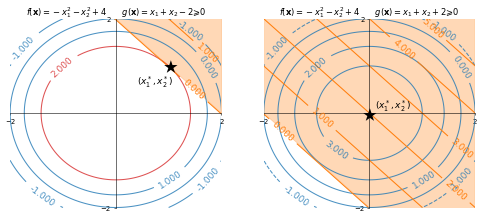

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

f = lambda x1, x2: -x1**2 - x2**2 + 4
g1 = lambda x1, x2: x1 + x2 - 2
g2 = lambda x1, x2: x1 + x2 + 2

def axesCross(ax):
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_position("zero")
    ax.spines["right"].set_color("none")

def draw_1(ax):
    axesCross(ax)
    ax.set_title(r"$f(\mathbf{x})=-x_1^2-x_2^2+4 \qquad g(\mathbf{x})=x_1+x_2-2\geqslant 0$")
    ax.set_xticks([-2,2])
    ax.set_yticks([-2,2])
    
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    
    z = f(1, 1)+1e4
    X1, X2 = np.mgrid[-2:2:100j, -2:2:100j]
    Z = f(X1, X2)
    Z[Z>z] = z
    cont = ax.contour(X1, X2, Z, levels=[-1, 0, 1, 2], colors=['C0', 'C0', 'C0', 'C3'], alpha=.8)
    ax.clabel(cont, fontsize=13, inline=1)
    ax.text(.81, .81, r'$\star$', fontsize=50)
    ax.text(.4, .6, r'$(x_1^*, x_2^*)$', fontsize=13)
    ax.fill_between([0, 2], [2, 0], [3, 3], color='C1', alpha=.3)
    G = g1(X1, X2)
    G[G<0] = 0
    g_cont = ax.contour(X1, X2, G, levels=range(0,10), colors='C1')
    ax.clabel(g_cont, fontsize=13, inline=1)
    
def draw_2(ax):
    axesCross(ax)
    ax.set_title(r"$f(\mathbf{x})=-x_1^2-x_2^2+4 \qquad g(\mathbf{x})=x_1+x_2+2\geqslant 0$")
    ax.set_xticks([-2,2])
    ax.set_yticks([-2,2])
    
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    
    X1, X2 = np.mgrid[-2:2:100j, -2:2:100j]
    Z = f(X1, X2)
    cont = ax.contour(X1, X2, Z, levels=range(-1, 5), colors='C0', alpha=.8)
    ax.clabel(cont, fontsize=13, inline=1)
    ax.text(-.21, -.21, r'$\star$', fontsize=50)
    ax.text(.1, .1, r'$(x_1^*, x_2^*)$', fontsize=13)
    ax.fill_between([-2, 2], [0, -4], [3, 3], color='C1', alpha=.3)
    G = g2(X1, X2)
    G[G<0] = 0
    g_cont = ax.contour(X1, X2, G, levels=range(0,10), colors='C1')
    ax.clabel(g_cont, fontsize=13, inline=1)
    
def main():
    fig = plt.figure(figsize=(12,5), dpi=50)
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    
    draw_1(ax1)
    draw_2(ax2)
    
    plt.show()
    
if __name__=="__main__":
    main()

# Primal Problem and Dual Problem

## Primal Problem

The primal problem is to maximize the function $f(\mathbf{x})$ suject to the constraint that $g(\mathbf{x})\geqslant 0$. And we have obtain its lagrangian given by

$$L(\mathbf{x}, \lambda) = f(\mathbf{x}) + \lambda g(\mathbf{x})$$

Now consider that the variable $\mathbf{x}$ take arbitrary values, then the minimun of the lagrangian is given by

$$\underset{\lambda\geqslant 0}{\text{min }}L(\mathbf{x}, \lambda) = \left\{\begin{array}{ll}
f(\mathbf{x}) & \mathbf{x}\ s.t.\ g(\mathbf{x})\geqslant 0\\
-\infty &\text{otherwise}
\end{array}\right.$$

Hence, we obtain a new expression that is equivalent to the primal problem

$$\underset{\mathbf{x}}{\text{max }} \underbrace{f(\mathbf{x})\quad s.t.\quad g(\mathbf{x})\geqslant 0}_{\text{Primal Problem}} \qquad \Leftrightarrow \qquad \underset{\mathbf{x}}{\text{max }}\underbrace{\underset{\lambda\geqslant 0}{\text{min }}L(\mathbf{x}, \lambda)}_{\text{Primal Problem }}$$

## Dual Problem

However, it is more efficient to solve the problem by transforming the problem to a dual form given by

$$\underset{\mathbf{x}}{\text{max }}\underbrace{\underset{\lambda\geqslant 0}{\text{min }}L(\mathbf{x}, \lambda)}_{\text{Primal Problem }\theta_P(\mathbf{x})} \overset{\text{some conditions}}{\qquad \Leftrightarrow \qquad} \underset{\lambda\geqslant 0}{\text{min }}\underbrace{\underset{\mathbf{x}}{\text{max }}L(\mathbf{x}, \lambda)}_{\text{Dual Problem }\theta_D(\lambda)}$$

- The primal problem $\theta_P(\mathbf{x})$ is subject to the constriant $\lambda \geqslant 0 $, which increase the difficulty of the outer evaluation of maximizing. As a result, it is hard to address the problem.
- The dual problem $\theta_D(\lambda)$ can be solved by setting the derivative with respect to $\mathbf{x}$ equal to zero. And then solving the constrain optimum is more easily.

## Duality

But in what situation does these two problems equivalent to each other?

Now assume these two problems have the same solution. 

$$\mathbf{x}^*, \lambda^* = \underset{\mathbf{x},\lambda}{\text{arg }}\Big( \underset{\mathbf{x}}{\text{max }}\underset{\lambda\geqslant 0}{\text{min }}L(\mathbf{x}, \lambda)\Big) = \underset{\mathbf{x},\lambda}{\text{arg }}\Big( \underset{\lambda\geqslant 0}{\text{min }}\underset{\mathbf{x}}{\text{max }}L(\mathbf{x}, \lambda)\Big)$$

Then 
$$ L(\mathbf{x}, \lambda^*) \leqslant L(\mathbf{x}^*, \lambda^*) \leqslant L(\mathbf{x}^*, \lambda)$$

There are two cases that primal problem is equal to the dual problem.
1. If the objective function with respect to $\mathbf{x}$ or $\lambda$ solely is a <font color='red'>**quadratic function**</font>, then $(\mathbf{x}^*,\lambda^*)$ is a <font color='red'>**saddle point**</font> , hence the objective function need to be convex over $\mathbf{x}$ and concave over $\lambda$, i.e.

$$\mathbf{x}^*, \lambda^* = \underset{\mathbf{x},\lambda}{\text{arg }}\Big(\nabla L(\mathbf{x},\lambda) = 0\Big) \qquad \text{and satisfy}\quad 
\left\{\begin{array}{ll}
\text{convex over }\mathbf{x}\\
\text{concave over }\lambda
\end{array}\right.$$

2. If the objective function with respect to the variable $\mathbf{x}$ or $\lambda$ is a <font color='red'>**linear function**</font> , and there is a point whose derivative with respect to $\mathbf{x}$ or $\lambda$ equal to zero, then the primal problem and dual problem are equal to each other. For example, the objective function takes the form $L(x,\lambda) =\lambda x-1$, we obtain 

$$
\left.\begin{array}{ll}
\underset{x}{\text{max }}L(x, \lambda) =
\left\{
\begin{array}{ll}
-1 &\frac{\partial L}{\partial x} = 0\\
\infty &\text{otherwise}
\end{array}\right.\\
\underset{\lambda}{\text{min }}L(x, \lambda) =
\left\{
\begin{array}{ll}
-1 &\frac{\partial L}{\partial \lambda} = 0\\
-\infty &\text{otherwise}
\end{array}\right.
\end{array}\right\}
\Rightarrow
\underset{\lambda}{\text{min }}\underset{x}{\text{max }}L(x, \lambda) 
= \underset{x}{\text{max }}\underset{\lambda}{\text{min }}L(x, \lambda) 
= -1$$

<font color='red'>These are the sufficient conditions that these two problems equivalent to each other.</font>

## Relation to SVM

Here is a SVM separable model

$$
\left.\begin{array}{ll}
\text{Problem:} & f(\mathbf{w}, b) = \underset{\mathbf{w},b}{min}\frac{1}{2}\|\mathbf{w}\|^2 \\
\text{Constraint:} &g_n(\mathbf{w}, b) = t_n(\mathbf{w}^T\phi(\mathbf{x}_n)+b) \geqslant 1 
\end{array}\right\}
\Rightarrow
L(\mathbf{w},b,\mathbf{a}) = \frac{1}{2}\|\mathbf{w}\|^2 - \sum_{n=1}^N a_n\{t_n(\mathbf{w}^T \phi(\mathbf{x}_n)+b)-1\} $$

where we are addressing the minimizing problem. According to the Lagrange multiplier theorem, the sign before the constraints in the objective function is negative. Different from the maximizing problem we discussed above, the primal and dual form of the minimizing problem are as follows.

$$\begin{array}{ll} 
\text{Primal Problem:} &\underset{\mathbf{w}, b}{\text{mim }}\underset{\mathbf{a}\geqslant 0}{\text{max }}L(\mathbf{w}, b, \mathbf{a}) \\
\text{Dual Problem:} &\underset{\mathbf{a}\geqslant 0}{\text{max }}\underset{\mathbf{w}, b}{\text{min }}L(\mathbf{w}, b, \mathbf{a})
\end{array}$$


Then we check if these two problems are equivalent in SVM. The sufficient condition is given by

$$\text{There is a saddle point }(\mathbf{w}^*, b^*, \mathbf{a}^*) = \underset{\mathbf{w},b,\mathbf{a}}{\text{arg }}\Big(\nabla L(\mathbf{w},b,\mathbf{a}) = 0\Big) \qquad \text{and satisfy}\quad 
\left\{\begin{array}{ll}
\text{quadratic concave or linear over }\mathbf{w}\\
\text{quadratic concave or linear over }b\\
\text{quadratic convex or linear over }\mathbf{a}\\
\end{array}\right.$$

1. The objective function is a quadratic function of $\mathbf{w}$ and its sign is positive, the quadratic function is therefore concave.
2. The objective function with respect to $b$ is a linear function, which is a also a condition that primal problem and dual problem are equivalent.
3. The objective function with respect to $\mathbf{a}$ is a linear function, which is a also a condition that primal problem and dual problem are equivalent.

Thus we can solve the dual problem instead of the primal problem to obtain the solution of SVM.

We first minimize the objective function with respect to $\mathbf{w}$ and $b$

$$\begin{align*}
0 &= \frac{\partial L}{\partial \mathbf{w}} = \mathbf{w} - \sum_{n=1}^N a_nt_n \phi(\mathbf{x}_n)\qquad \Rightarrow \qquad \mathbf{w} = \sum_{n=1}^N a_nt_n \phi(\mathbf{x}_n) \\
0 &= \frac{\partial L}{\partial b} = \sum_{n=1}^N a_n t_n 
\end{align*}$$

Then substituting these condition into $L$, we can eliminate $\mathbf{w}$ and $b$ such that obtain a dual representation

$$\begin{align*}
L(\mathbf{w}^*,b^*,\mathbf{a}) &= \frac{1}{2}\sum_{n=1}^N a_n t_n \phi(\mathbf{x}_n) \sum_{m=1}^N a_m t_m \phi(\mathbf{x}_m) - \left\{\sum_{n=1}^N a_n t_n\left(\sum_{m=1}^N a_m t_m \phi(\mathbf{x}_m)^T\right)\phi(\mathbf{x}_n) + \sum_{n=1}^N a_n t_n b - \sum_{n=1}^N a_n\right\} \\
&= \sum_{n=1}^N a_n - \frac{1}{2}\sum_{n=1}^N\sum_{m=1}^N a_n a_m t_n t_m k(\mathbf{x}_n, \mathbf{x}_m) 
\end{align*}$$

The last step is to maximize this objective function, or say to solve the quadratic problem, subject to the constraint $\mathbf{a}\geqslant 0$. The final multipliers $\mathbf{a}'$ is not equal to $\mathbf{a}^*$ due to the constraint $\mathbf{a}\geqslant 0$. 
- For those lagrange multipliers whose partial derivative is larger than or equal to zero, they can reach the point which partial derivatives is equal to zero. Hence
$$a_n> 0 \Leftrightarrow \frac{\partial L}{\partial a_n} = t_n(\mathbf{w}^T\phi(\mathbf{x}_n))-1 = 0$$
- For the lagrange multiplier whose partial derivative is less than zero, they can will be clipped by the constriant. The partial derivatives of these multipliers at the clipped point are of course not equal to zero.
$$a_n = 0 \Leftrightarrow \frac{\partial L}{\partial a_n} = t_n(\mathbf{w}^T\phi(\mathbf{x}_n))-1 > 0$$